<a href="https://colab.research.google.com/github/andrejuniorba/Analises_estudos/blob/main/An%C3%A1lise_quantitativa_de_Fundos_Imobili%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------
# **Análise quantitativa de Fundos de Investimentos Imobiliários**
------

In [41]:
#Bibliotecas para web scraping
!pip install requests
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

#Configurar para mostrar todas as colunas
pd.set_option('max_columns',26)

---
# **Web Scraping**
---

In [43]:
dados_url = requests.get('https://www.fundsexplorer.com.br/ranking')
dados_url

<Response [200]>

In [44]:
#Verificar a extração
dados_url.text

'<!DOCTYPE html>\n<html lang="pt-br">\n\n<head>\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"7ae9c6eb2d","applicationID":"1576126089","transactionName":"IAkLQhFbWVUBQhdKVwcDFl8EWhpLBV5TUVwESQxYB1FN","queueTime":2,"applicationTime":15,"agent":""}</script>\n<script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"7ae9c6eb2d",applicationID:"1576126089"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()].concat(c(a

In [45]:
#Organizar o html extraído do site
dados_bs4 = BeautifulSoup(dados_url.text,'html.parser')
#Apresentar uma amostra organizada devido ao tamanho
dados_bs4.head()

[<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"7ae9c6eb2d","applicationID":"1576126089","transactionName":"IAkLQhFbWVUBQhdKVwcDFl8EWhpLBV5TUVwESQxYB1FN","queueTime":2,"applicationTime":15,"agent":""}</script>,
 <script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"7ae9c6eb2d",applicationID:"1576126089"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()].concat(c(arguments)),n?null:this,r),n?void 0:this}}var o=

In [46]:
#Extraindo a tabela de acordo ao nome 'id' que é dado no código HTML
dados_tabela = dados_bs4.findAll(attrs = {'id':'scroll-wrapper'})

In [47]:
#Indexando pelo início
dados_tabela[0]

<div data-simplebar="" id="scroll-wrapper">
<table class="table table-hover" id="table-ranking">
<thead>
<tr>
<th>Código<br/>do fundo</th>
<th>Setor</th>
<th>Preço Atual<img alt="Mais informações" data-title="Preço de fechamento da cota do Dia Anterior." data-toggle="tooltip" src="/assets/icons/info-f75f205def6f00c6de7f471dfb953f49c56688839ec91a31271252def5bf299c.svg"/></th>
<th>Liquidez Diária<img alt="Mais informações" data-title="Quantidade de negócios realizados no Dia anterior." data-toggle="tooltip" src="/assets/icons/info-f75f205def6f00c6de7f471dfb953f49c56688839ec91a31271252def5bf299c.svg"/></th>
<th>Dividendo<img alt="Mais informações" data-title="Último dividendo anunciado." data-toggle="tooltip" src="/assets/icons/info-f75f205def6f00c6de7f471dfb953f49c56688839ec91a31271252def5bf299c.svg"/></th>
<th>Dividend<br/>Yield<img alt="Mais informações" data-title="Retorno calculado sobre a divisão do último dividendo pela cota de fechamento do mês." data-toggle="tooltip" src="/assets

In [48]:
tabela = dados_tabela[0].findAll('table')

In [49]:
#Forçando a leitura como strings e indexando
df_FIIs = pd.read_html(str(dados_tabela[0]))[0]
#Apresentando as 5 primeiras linhas do DF
df_FIIs.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,20",1553.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","0,00%","0,00%","R$ 65.678.487,99","R$ 6,98",32.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,68%","0,68%","1,14%","R$ 431.076.817,02","R$ 10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 6,19",78.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","1,10%","1,10%","-37,83%","R$ 27.305.951,24","R$ 13,89",45.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 930,00",46.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","2,27%","2,27%","-28,29%","R$ 249.632.973,43","R$ 2.245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 7,46",14.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","-19,84%","-19,84%","-31,62%","R$ -9.546.407,61","R$ -12,59",-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [50]:
#Verificando as colunas
df_FIIs.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

In [51]:
#Verificar os fundos imobiliários negociados no Brasil em ordem alfabética
str(list(df_FIIs['Códigodo fundo'].sort_values()))

"['ABCP11', 'AFHI11', 'AFOF11', 'AIEC11', 'ALMI11', 'ALZR11', 'APTO11', 'ARCT11', 'ARRI11', 'ATSA11', 'BARI11', 'BBFI11B', 'BBFO11', 'BBGO11', 'BBIM11', 'BBPO11', 'BBRC11', 'BCFF11', 'BCIA11', 'BCRI11', 'BICE11', 'BICR11', 'BIME11', 'BLCA11', 'BLCP11', 'BLMC11', 'BLMG11', 'BLMO11', 'BLMR11', 'BMLC11', 'BNFS11', 'BPFF11', 'BPML11', 'BRCO11', 'BRCR11', 'BREV11', 'BRLA11', 'BTAL11', 'BTCR11', 'BTLG11', 'BTRA11', 'BTSG11', 'BTWR11', 'BZLI11', 'CACR11', 'CARE11', 'CBOP11', 'CCRF11', 'CEOC11', 'CJCT11', 'CNES11', 'CORM11', 'CPFF11', 'CPTS11', 'CRFF11', 'CTXT11', 'CVBI11', 'CXAG11', 'CXCE11B', 'CXCI11', 'CXCO11', 'CXRI11', 'CXTL11', 'CYCR11', 'DEVA11', 'DRIT11B', 'DVFF11', 'EDFO11B', 'EDGA11', 'EQIR11', 'ERCR11', 'ERPA11', 'EURO11', 'EVBI11', 'FAED11', 'FAMB11B', 'FATN11', 'FCFL11', 'FEXC11', 'FIGS11', 'FIIB11', 'FIIP11B', 'FISC11', 'FIVN11', 'FLCR11', 'FLMA11', 'FLRP11', 'FMOF11', 'FPAB11', 'FVPQ11', 'GALG11', 'GAME11', 'GCFF11', 'GCRA11', 'GCRI11', 'GESE11B', 'GGRC11', 'GSFI11', 'GTLG11', '

---
# **Organização dos dados**
---

In [52]:
#Backup do Dataframe original
df_FIIs_backup = df_FIIs.copy()

In [53]:
df_FIIs.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,20",1553.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","0,00%","0,00%","R$ 65.678.487,99","R$ 6,98",32.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,68%","0,68%","1,14%","R$ 431.076.817,02","R$ 10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 6,19",78.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","1,10%","1,10%","-37,83%","R$ 27.305.951,24","R$ 13,89",45.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 930,00",46.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","2,27%","2,27%","-28,29%","R$ 249.632.973,43","R$ 2.245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 7,46",14.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","-19,84%","-19,84%","-31,62%","R$ -9.546.407,61","R$ -12,59",-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [54]:
df_FIIs['Preço Atual']

0        R$ 2,20
1       R$ 14,70
2        R$ 6,19
3      R$ 930,00
4        R$ 7,46
         ...    
277    R$ 379,19
278     R$ 87,02
279     R$ 75,80
280     R$ 76,42
281    R$ 115,33
Name: Preço Atual, Length: 282, dtype: object

In [55]:
#Encontrar a string R$ e substituir por um valor vazio
df_FIIs = df_FIIs.replace(to_replace = r'^R\$ ', value = '', regex = True)

In [56]:
df_FIIs.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"2,20",1553.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","0,00%","0,00%","65.678.487,99","6,98",32.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"14,70",44041.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,68%","0,68%","1,14%","431.076.817,02","10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"6,19",78.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","1,10%","1,10%","-37,83%","27.305.951,24","13,89",45.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"930,00",46.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","2,27%","2,27%","-28,29%","249.632.973,43","2.245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"7,46",14.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","-19,84%","-19,84%","-31,62%","-9.546.407,61","-12,59",-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [57]:
df_FIIs['PatrimônioLíq.']

0         65.678.487,99
1        431.076.817,02
2         27.305.951,24
3        249.632.973,43
4         -9.546.407,61
             ...       
277       50.992.934,89
278      195.230.258,40
279      376.309.193,73
280      489.344.835,30
281    2.187.502.617,24
Name: PatrimônioLíq., Length: 282, dtype: object

In [58]:
#Retirar o separador de milhar que está sendo um ponto
df_FIIs['PatrimônioLíq.'] = df_FIIs['PatrimônioLíq.'].str.replace('.','')
df_FIIs['Preço Atual'] = df_FIIs['Preço Atual'].str.replace('.','')
df_FIIs['Dividendo'] = df_FIIs['Dividendo'].str.replace('.','')
df_FIIs['VPA'] = df_FIIs['VPA'].str.replace('.','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular

In [59]:
df_FIIs.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"2,20",1553.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","0,00%","0,00%","65678487,99","6,98",32.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"14,70",44041.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,68%","0,68%","1,14%","431076817,02","10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"6,19",78.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","1,10%","1,10%","-37,83%","27305951,24","13,89",45.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"930,00",46.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","2,27%","2,27%","-28,29%","249632973,43","2245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"7,46",14.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","-19,84%","-19,84%","-31,62%","-9546407,61","-12,59",-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [60]:
#Modificar o separador vírgula por ponto
df_FIIs['PatrimônioLíq.'] = df_FIIs['PatrimônioLíq.'].str.replace(',','.')
df_FIIs['Preço Atual'] = df_FIIs['Preço Atual'].str.replace(',','.')
df_FIIs['Dividendo'] = df_FIIs['Dividendo'].str.replace(',','.')
df_FIIs['VPA'] = df_FIIs['VPA'].str.replace(',','.')

In [61]:
df_FIIs['PatrimônioLíq.']

0        65678487.99
1       431076817.02
2        27305951.24
3       249632973.43
4        -9546407.61
           ...      
277      50992934.89
278     195230258.40
279     376309193.73
280     489344835.30
281    2187502617.24
Name: PatrimônioLíq., Length: 282, dtype: object

In [62]:
#Transformar as variáveis para float
df_FIIs['PatrimônioLíq.'] = df_FIIs['PatrimônioLíq.'].astype(float)
df_FIIs['Preço Atual'] = df_FIIs['Preço Atual'].astype(float)
df_FIIs['Dividendo'] = df_FIIs['Dividendo'].astype(float)
df_FIIs['VPA'] = df_FIIs['VPA'].astype(float)

In [63]:
#Valor máximo
np.max(df_FIIs['Preço Atual'])

76000.0

In [64]:
np.min(df_FIIs['Preço Atual'])

0.9

In [65]:
#Encontrar a string que terminam com %
df_FIIs = df_FIIs.replace(to_replace = r'%$', value = '', regex = True)


In [66]:
df_FIIs['DividendYield'] = df_FIIs['DividendYield'].str.replace(',','.').astype(float)
df_FIIs['DY (3M)Acumulado'] = df_FIIs['DY (3M)Acumulado'].str.replace(',','.').astype(float)
df_FIIs['DY (6M)Acumulado'] = df_FIIs['DY (6M)Acumulado'].str.replace(',','.').astype(float)
df_FIIs['DY (12M)Acumulado'] = df_FIIs['DY (12M)Acumulado'].str.replace(',','.').astype(float)
df_FIIs['DY (3M)Média'] = df_FIIs['DY (3M)Média'].str.replace(',','.').astype(float)
df_FIIs['DY (6M)Média'] = df_FIIs['DY (6M)Média'].str.replace(',','.').astype(float)
df_FIIs['DY (12M)Média'] = df_FIIs['DY (12M)Média'].str.replace(',','.').astype(float)
df_FIIs['DY Ano'] = df_FIIs['DY Ano'].str.replace(',','.').astype(float)
df_FIIs['Variação Preço'] = df_FIIs['Variação Preço'].str.replace(',','.').astype(float)
df_FIIs['Rentab.Período'] = df_FIIs['Rentab.Período'].str.replace(',','.').astype(float)
df_FIIs['Rentab.Acumulada'] = df_FIIs['Rentab.Acumulada'].str.replace(',','.').astype(float)
df_FIIs['DYPatrimonial'] = df_FIIs['DYPatrimonial'].str.replace(',','.').astype(float)
df_FIIs['VariaçãoPatrimonial'] = df_FIIs['VariaçãoPatrimonial'].str.replace(',','.').astype(float)
df_FIIs['Rentab. Patr.no Período'] = df_FIIs['Rentab. Patr.no Período'].str.replace(',','.').astype(float)
df_FIIs['Rentab. Patr.Acumulada'] = df_FIIs['Rentab. Patr.Acumulada'].str.replace(',','.').astype(float)
df_FIIs['VacânciaFísica'] = df_FIIs['VacânciaFísica'].str.replace(',','.').astype(float)
df_FIIs['VacânciaFinanceira'] = df_FIIs['VacânciaFinanceira'].str.replace(',','.').astype(float)



In [67]:
df_FIIs.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,2.20,1553.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.00,0.00,6.567849e+07,6.98,32.0,NaN,NaN,NaN,NaN,56.00,NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.68,1.14,4.310768e+08,10.70,137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,6.19,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.10,1.10,-37.83,2.730595e+07,13.89,45.0,NaN,NaN,NaN,NaN,0.00,100.0,1
3,ALMI11,Lajes Corporativas,930.00,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.27,2.27,-28.29,2.496330e+08,2245.37,41.0,NaN,NaN,NaN,NaN,64.05,NaN,1
4,PABY11,Híbrido,7.46,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.84,-19.84,-31.62,-9.546408e+06,-12.59,-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [68]:
#Quais setores exigem no DF (passa dentro de um conjunto para evitar repetições)
set(df_FIIs['Setor'])

{'Hospital',
 'Hotel',
 'Híbrido',
 'Lajes Corporativas',
 'Logística',
 'Outros',
 'Residencial',
 'Shoppings',
 'Títulos e Val. Mob.',
 nan}

In [69]:
#Maior DividendYield anual em porcentagem
np.max(df_FIIs['DividendYield'])

2.9

In [70]:
df_FIIs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           282 non-null    object 
 1   Setor                    278 non-null    object 
 2   Preço Atual              274 non-null    float64
 3   Liquidez Diária          274 non-null    float64
 4   Dividendo                282 non-null    float64
 5   DividendYield            276 non-null    float64
 6   DY (3M)Acumulado         276 non-null    float64
 7   DY (6M)Acumulado         276 non-null    float64
 8   DY (12M)Acumulado        276 non-null    float64
 9   DY (3M)Média             276 non-null    float64
 10  DY (6M)Média             276 non-null    float64
 11  DY (12M)Média            276 non-null    float64
 12  DY Ano                   262 non-null    float64
 13  Variação Preço           276 non-null    float64
 14  Rentab.Período           2

In [71]:
#Contagem de valores NaN de cada variável (em porcentagem)
#Cabe avaliar qual das colunas seria desnecessário considerando a porcentagem alta em relação ao NaN
df_FIIs.isna().sum() / len(df_FIIs) * 100

Códigodo fundo              0.000000
Setor                       1.418440
Preço Atual                 2.836879
Liquidez Diária             2.836879
Dividendo                   0.000000
DividendYield               2.127660
DY (3M)Acumulado            2.127660
DY (6M)Acumulado            2.127660
DY (12M)Acumulado           2.127660
DY (3M)Média                2.127660
DY (6M)Média                2.127660
DY (12M)Média               2.127660
DY Ano                      7.092199
Variação Preço              2.127660
Rentab.Período              2.127660
Rentab.Acumulada            2.127660
PatrimônioLíq.              0.000000
VPA                         0.000000
P/VPA                       2.836879
DYPatrimonial              12.411348
VariaçãoPatrimonial        12.411348
Rentab. Patr.no Período    12.411348
Rentab. Patr.Acumulada     12.411348
VacânciaFísica             56.382979
VacânciaFinanceira         89.361702
QuantidadeAtivos            0.000000
dtype: float64

In [72]:
df_FIIs.shape

(282, 26)

In [73]:
#Excluir as linhas nas quais não existe o preço atual, o DividendYield e Setor.
df_FIIs.dropna(subset = ['Preço Atual', 'DividendYield', 'Setor'], inplace = True)

In [74]:
df_FIIs.shape

(264, 26)

---
# **Análise exploratória**
---

### Quanto maior o DY, maior o preço? 

Não necessariamente. Podemos verificar no gráfico de dispersão (através dos outliers) que nem toda relação entre preço e DY segue esse parâmetro.

In [75]:
import plotly.express as px

In [76]:
#Gráfico de dispersão
fig = px.scatter(df_FIIs, x = 'Preço Atual', y = 'DY (12M)Acumulado', color = 'Setor')
fig.show()

In [77]:
#Ajustando a escala para melhorar a visualização
df_FIIs['log Preço Atual'] = np.log(df_FIIs['Preço Atual']+1)

fig = px.scatter(df_FIIs, x = 'log Preço Atual', y = 'DY (12M)Acumulado', color = 'Setor')
fig.show()

### Matriz de correlação levando em consideração as variáveis do DF.

É possível verificar que existem algumas correlações fortes com o preço e outras não.

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

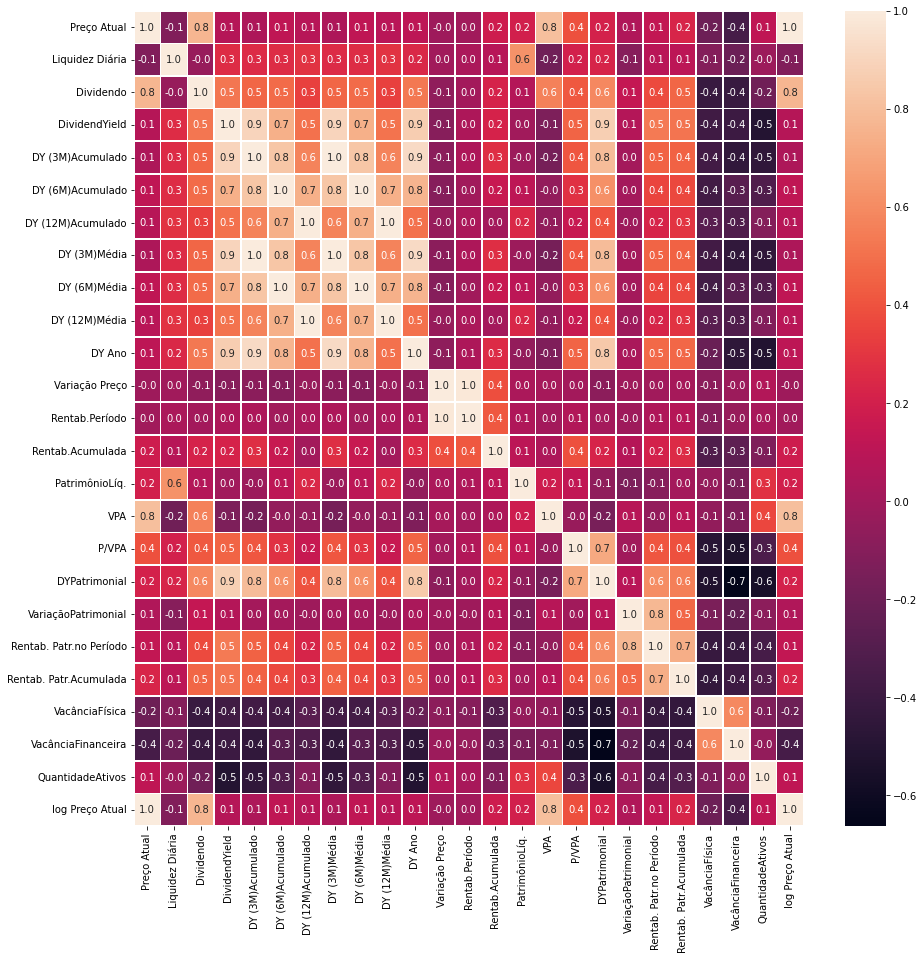

In [79]:
fig, ax = plt.subplots(figsize = (15,15))
matriz_correlacao = df_FIIs.corr(method = 'spearman')

#Configurações do gráfico
plot = sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f', linewidths = 0.7)

#Aumentar o tamanho da fonte
plt.rcParams.update({'font.size':10})

### Comparação entre a média e mediana dos DY(12M) a fim de entender essa relação e verificar os que tem melhor média de retorno dentre esses DY.

Podemos destacar as três primeiras linhas como sendo os setores com as melhores médias de pagamento dos dividendos. Seria necessário verificar aqueles que estão dentro da denominação "Outros".

In [81]:
pivot_table_FIIs = pd.pivot_table(df_FIIs, values = 'DY (12M)Acumulado', index = ['Setor'], columns = [], aggfunc = ('mean', 'median'))
#Ordenando pela maior média (sentido decrescente)
pivot_table_FIIs.sort_values('mean', ascending = False)

,mean,median
Setor,,
Outros,9.391176,9.990
Hospital,8.563333,9.330
Títulos e Val. Mob.,8.520889,10.360
Logística,7.820455,8.115
Híbrido,7.100455,7.960
Lajes Corporativas,6.926667,7.260
Hotel,6.826667,5.410
Shoppings,5.252273,6.790
Residencial,2.394286,0.000


### Fundos com P/VPA menor que 1, isto é, a empresa vale em bolsa menos do que o seu patrimônio líquido.

In [83]:
#Criando a coluna apenas com os FIIs com P/VPA < 1
df_FIIs['Fundos_VPA'] = df_FIIs['P/VPA'] < 100

FII_VPA = df_FIIs[df_FIIs['Fundos_VPA']==True]
FII_VPA

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,...,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos,log Preço Atual,Fundos_VPA
0,FIVN11,Shoppings,2.20,1553.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,...,0.00,6.567849e+07,6.98,32.0,NaN,NaN,NaN,NaN,56.00,NaN,1,1.163151,True
2,XTED11,Lajes Corporativas,6.19,78.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-37.83,2.730595e+07,13.89,45.0,NaN,NaN,NaN,NaN,0.00,100.0,1,1.972691,True
3,ALMI11,Lajes Corporativas,930.00,46.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-28.29,2.496330e+08,2245.37,41.0,NaN,NaN,NaN,NaN,64.05,NaN,1,6.836259,True
4,PABY11,Híbrido,7.46,14.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-31.62,-9.546408e+06,-12.59,-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1,2.135349,True
8,HSML11,Shoppings,77.50,15523.0,0.60,0.74,2.27,4.37,7.72,0.76,0.73,0.64,2.99,...,9.17,1.479544e+09,93.76,83.0,0.64,-0.06,0.58,1.59,4.50,NaN,5,4.363099,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,RNDP11,Títulos e Val. Mob.,379.19,4.0,4.26,1.12,2.84,4.83,8.38,0.95,0.80,0.70,3.50,...,-34.41,5.099293e+07,474.44,80.0,0.90,-29.72,-29.09,-27.55,NaN,NaN,0,5.940671,True
278,PLCR11,Híbrido,87.02,2690.0,1.10,1.26,3.63,7.16,12.96,1.21,1.19,1.08,4.81,...,3.81,1.952303e+08,92.56,94.0,1.19,-0.09,1.10,4.62,NaN,NaN,0,4.477564,True
279,CXCO11,Lajes Corporativas,75.80,6905.0,0.73,0.94,2.64,5.16,9.31,0.88,0.86,0.78,3.44,...,-0.64,3.763092e+08,95.89,79.0,0.76,-0.13,0.63,2.53,NaN,NaN,0,4.341205,True
280,PATL11,Híbrido,76.42,9681.0,0.58,0.75,2.27,4.69,9.13,0.76,0.78,0.76,3.04,...,4.88,4.893448e+08,98.03,78.0,0.59,-0.06,0.54,2.39,0.00,0.0,4,4.349245,True


### Fundos com P/VPA menor que 1 e DY anual maior ou igual a 10%

In [85]:
Selecionar_FII_VPA = FII_VPA[FII_VPA['DY (12M)Acumulado'] >= 10]
Selecionar_FII_VPA

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,...,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos,log Preço Atual,Fundos_VPA
10,SPTW11,Lajes Corporativas,44.00,6623.0,0.40,0.90,2.71,5.30,16.30,0.90,0.88,1.36,3.59,...,1.30,9.506514e+07,52.87,83.0,0.76,0.06,0.81,3.30,0.00,NaN,1,3.806662,True
17,PLRI11,Títulos e Val. Mob.,37.40,452.0,0.21,0.52,4.06,7.82,10.95,1.35,1.30,0.91,6.80,...,12.89,3.721710e+07,39.00,96.0,0.53,-1.58,-1.06,-0.98,NaN,NaN,0,3.648057,True
19,PORD11,Títulos e Val. Mob.,94.50,8149.0,1.41,1.49,3.95,7.54,13.24,1.32,1.26,1.10,5.20,...,6.72,3.698597e+08,99.20,95.0,1.42,0.03,1.45,4.92,NaN,NaN,0,4.559126,True
28,RRCI11,Títulos e Val. Mob.,90.70,1646.0,1.30,1.41,4.25,7.95,13.62,1.42,1.32,1.13,5.56,...,13.74,4.726013e+07,98.10,92.0,1.33,0.38,1.72,5.92,NaN,NaN,0,4.518522,True
29,BBFO11,Títulos e Val. Mob.,73.80,1700.0,0.77,1.05,3.03,5.96,10.31,1.01,0.99,0.86,4.14,...,5.70,3.431596e+08,85.71,86.0,0.90,0.28,1.18,2.46,NaN,NaN,0,4.314818,True
31,HBRH11,Híbrido,81.79,1236.0,0.71,0.85,2.68,6.11,10.40,0.89,1.02,0.87,3.51,...,-4.78,3.137782e+08,113.19,72.0,0.63,0.61,1.24,3.22,NaN,NaN,3,4.416307,True
34,AIEC11,Lajes Corporativas,79.44,2566.0,0.72,0.90,3.35,5.84,10.22,1.12,0.97,0.85,4.13,...,6.58,4.885024e+08,101.24,78.0,0.71,0.02,0.74,2.64,0.00,NaN,2,4.387512,True
35,HSAF11,Títulos e Val. Mob.,94.12,3269.0,1.15,1.21,3.60,7.00,13.07,1.20,1.17,1.09,4.77,...,5.57,1.684045e+08,94.95,99.0,1.21,0.40,1.61,4.24,NaN,NaN,0,4.555139,True
38,RFOF11,Títulos e Val. Mob.,70.72,3967.0,0.67,0.94,2.78,5.43,10.13,0.93,0.91,0.84,3.66,...,0.84,9.129462e+07,84.68,84.0,0.79,1.28,2.08,0.24,NaN,NaN,0,4.272770,True
42,MGHT11,Hotel,71.12,3575.0,0.80,1.01,2.91,5.67,10.20,0.97,0.94,0.85,3.82,...,-6.67,1.297777e+08,98.78,72.0,0.81,0.18,0.99,1.81,NaN,NaN,0,4.278331,True


### Selecionando os Fundos levando em consideração o setor e o DY anual.

In [127]:
selecionar_setores = ['Códigodo fundo','Setor']

In [128]:
microdados_Setores = Selecionar_FII_VPA.filter(items = selecionar_setores)
microdados_Setores.head()

,Códigodo fundo,Setor
10,SPTW11,Lajes Corporativas
17,PLRI11,Títulos e Val. Mob.
19,PORD11,Títulos e Val. Mob.
28,RRCI11,Títulos e Val. Mob.
29,BBFO11,Títulos e Val. Mob.


### Verificando a quantidade de Fundos por setores.

In [129]:
microdados_Setores.groupby('Setor').count()

,Códigodo fundo
Setor,
Hotel,1
Híbrido,8
Lajes Corporativas,8
Logística,2
Outros,14
Títulos e Val. Mob.,24


In [130]:
dados = Selecionar_FII_VPA[['Códigodo fundo', 'Setor', 'DY (12M)Acumulado']]
dados.head()

,Códigodo fundo,Setor,DY (12M)Acumulado
10,SPTW11,Lajes Corporativas,16.30
17,PLRI11,Títulos e Val. Mob.,10.95
19,PORD11,Títulos e Val. Mob.,13.24
28,RRCI11,Títulos e Val. Mob.,13.62
29,BBFO11,Títulos e Val. Mob.,10.31


### Visualização dos maiores DY(anual) por setor

In [131]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
pd.options.plotting.backend = 'plotly'

In [133]:
Selecionar_FII_VPA.plot(x = 'Códigodo fundo',y ='DY (12M)Acumulado', kind = 'hist', title = 'Código do fundo x Dividendos(anual) x Setor', color = 'Setor')